In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [193]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [194]:
df.head(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
5,CH,36.0,6,4.0,6.0,7.0,3.0,8.0,7.0,4.0,2.0,NaN,2.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0


In [195]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [196]:
#we fill null values with the median of the df. instead of by country and mean
for col in df[df.columns.drop(['cntry','gndr','partner'])]:
    df[col] = df[col].fillna(value=df[col].median())
    


df.gndr = pd.to_numeric(np.where(df.gndr == 2.0, 0,1))
df.partner = np.where(df.partner == 2.0, 0,1)

In [197]:
df.head(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,0,60.0,1
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,0,59.0,1
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1,24.0,0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,0,64.0,1
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,0,55.0,1
5,CH,36.0,6,4.0,6.0,7.0,3.0,8.0,7.0,4.0,0,47.0,0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1,76.0,1
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,0,30.0,1
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,0,84.0,0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,0,62.0,1


In [198]:
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In this dataset, the same participants answered questions in 2012 and again 2014.

    Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
    Did people become happier from 2012 to 2014? Compute results for each country in the sample.
    Who reported watching more TV in 2012, men or women?
    Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
    Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
    Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


#### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

CH


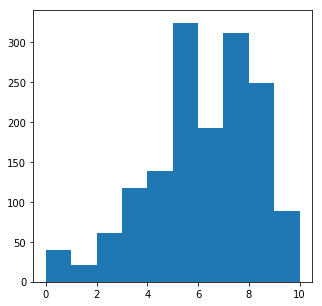

CZ


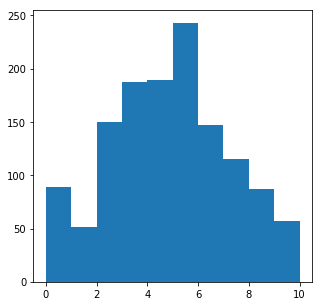

DE


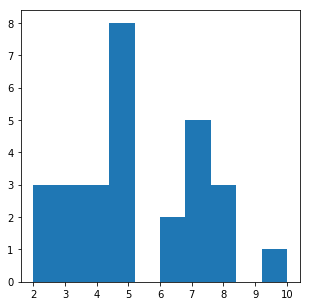

ES


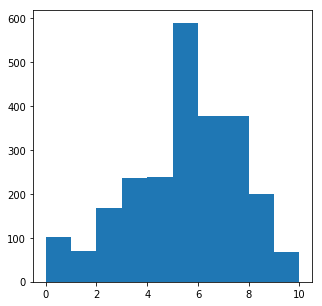

NO


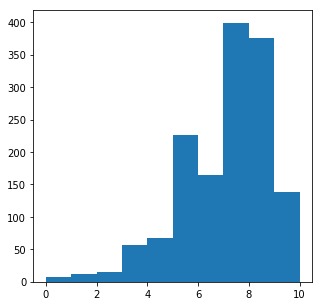

SE


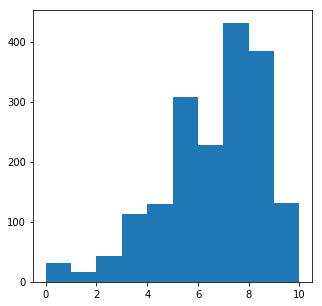

In [199]:
for i in y2012.cntry.unique():
    print(i)
    plt.figure(figsize=(5,5))
    plt.hist(df[df.cntry == i]['ppltrst'])
    plt.show()

CH


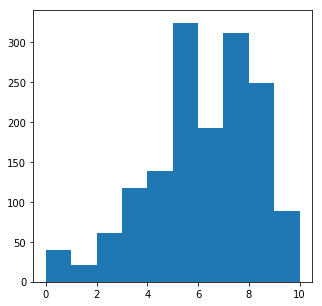

CZ


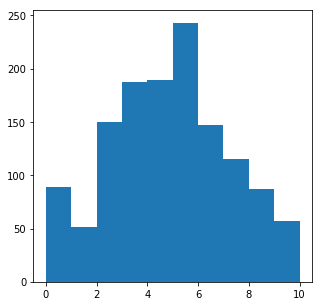

DE


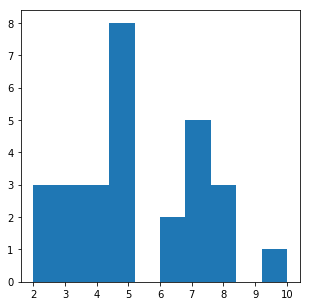

ES


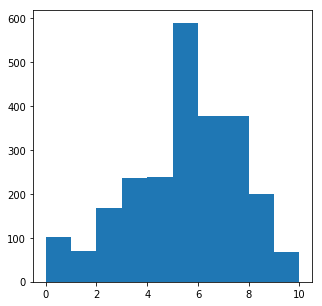

NO


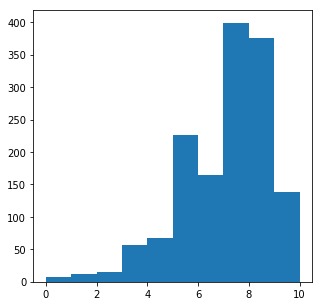

SE


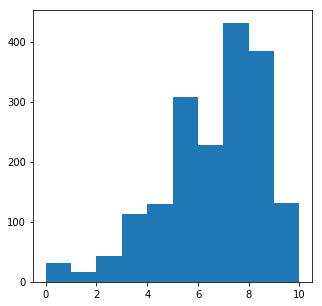

In [200]:
for i in y2014.cntry.unique():
    print(i)
    plt.figure(figsize=(5,5))
    plt.hist(df[df.cntry == i]['ppltrst'])
    plt.show()
    

The distributions arent particularly 'normal' but they will have to do.

In [208]:
y12 = df[df.year == 6]
y14 = df[df.year == 7]
for country in y12.cntry.unique():    
    cntry_trst12 = y12[y12.cntry == country]['ppltrst']
    cntry_trst14 = y14[y14.cntry == country]['ppltrst']
    print("Country:{}".format(country))
    print('2012 Mean: {}'.format(cntry_trst12.describe()))
    print('2014 Mean : {}'.format(cntry_trst14.describe()))
    print(stats.ttest_rel(cntry_trst12,cntry_trst14))
    print(stats.ttest_ind(cntry_trst12,cntry_trst14))
    print(stats.wilcoxon(cntry_trst12,cntry_trst14))
    print('\n\n')

Country:CH
2012 Mean: count    773.000000
mean       5.677878
std        2.130701
min        0.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: ppltrst, dtype: float64
2014 Mean : count    773.000000
mean       5.751617
std        2.143888
min        0.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: ppltrst, dtype: float64
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)



Country:CZ
2012 Mean: count    658.000000
mean       4.379939
std        2.402756
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: ppltrst, dtype: float64
2014 Mean : count    658.000000
mean       4.427052
std        2.304452
min        0.000000
25%        3.000000
50%        5.000000
75%        6.000000
max     

Answer: It appears that people became more trusting in general, but not significantly. Only two country had significant changes. People in Estonia become less trusting and people in Sweden became more trusting.

#### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

CH


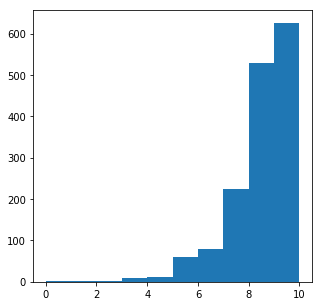

CZ


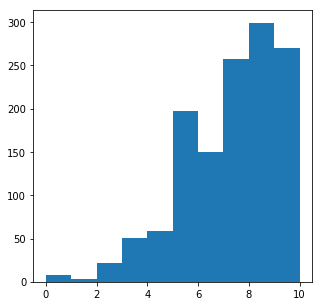

DE


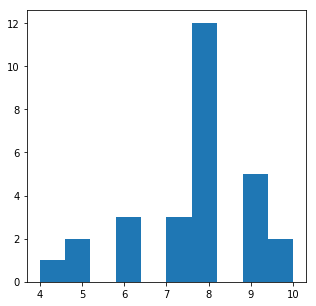

ES


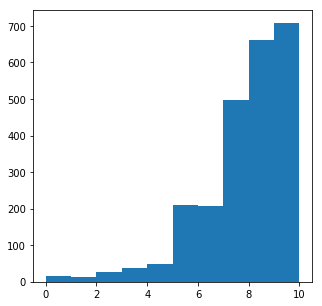

NO


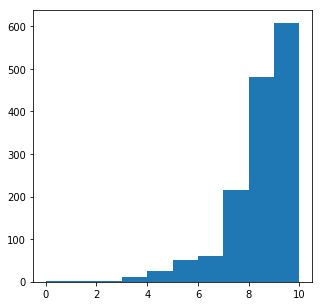

SE


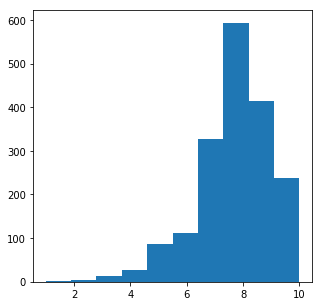

In [202]:
for i in y2012.cntry.unique():
    print(i)
    plt.figure(figsize=(5,5))
    plt.hist(df[df.cntry == i]['happy'].dropna())
    plt.show()

In [207]:
for country in y12.cntry.unique():    
    cntry_trst12 = y12[y12.cntry == country]['happy']
    cntry_trst14 = y14[y14.cntry == country]['happy']
    cntry_trst12 = cntry_trst12.fillna(value=cntry_trst12.mean())
    cntry_trst14 = cntry_trst14.fillna(value=cntry_trst14.mean())
    print("Country:{}".format(country))
    print('2012 Mean: {}'.format(cntry_trst12.describe()))
    print('2014 Mean : {}'.format(cntry_trst14.describe()))
    print(stats.ttest_rel(cntry_trst12,cntry_trst14))
    print(stats.ttest_ind(cntry_trst12,cntry_trst14))
    print(stats.wilcoxon(cntry_trst12,cntry_trst14))
    print('\n\n')

Country:CH
2012 Mean: count    773.000000
mean       8.087969
std        1.435134
min        0.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: happy, dtype: float64
2014 Mean : count    773.000000
mean       8.116429
std        1.405725
min        0.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: happy, dtype: float64
Ttest_relResult(statistic=-0.390038452178481, pvalue=0.6966156998700268)
Ttest_indResult(statistic=-0.3938900009021593, pvalue=0.6937166425548135)
WilcoxonResult(statistic=93384.0, pvalue=0.9248463130390704)



Country:CZ
2012 Mean: count    658.000000
mean       6.793313
std        2.041387
min        0.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: happy, dtype: float64
2014 Mean : count    658.000000
mean       6.924012
std        1.896966
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.0000

Who reported watching more TV in 2012, men or women?

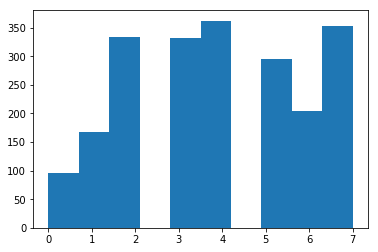

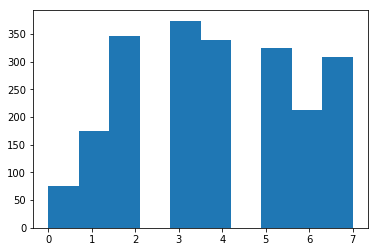

In [209]:
mtv12 = y12[y12.gndr == 0]['tvtot']
ftv12 = y12[y12.gndr == 1]['tvtot']
plt.hist(y12[y12.gndr == 0]['tvtot'])
plt.show()
plt.hist(y12[y12.gndr == 1]['tvtot'])
plt.show()

In [213]:
mtv12.describe()

count    2143.000000
mean        3.944470
std         2.048022
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: tvtot, dtype: float64

In [214]:
ftv12.describe()

count    2154.000000
mean        3.902043
std         1.982310
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: tvtot, dtype: float64

In [212]:
print(stats.ttest_ind(mtv12,ftv12))
#print(stats.wilcoxon(mtv12,ftv12))
print(stats.mannwhitneyu(mtv12,ftv12))
print("Median_test:{}".format(stats.median_test(mtv12,ftv12)))


Ttest_indResult(statistic=0.6900012172591534, pvalue=0.49023070220255527)
MannwhitneyuResult(statistic=2277450.5, pvalue=0.2237635506897072)
Median_test:(0.10426985208133409, 0.7467645942644672, 4.0, array([[ 853,  846],
       [1290, 1308]], dtype=int64))


Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

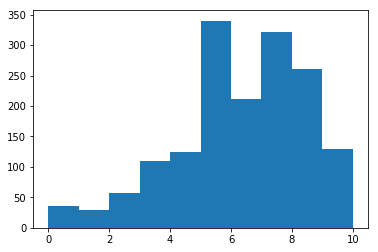

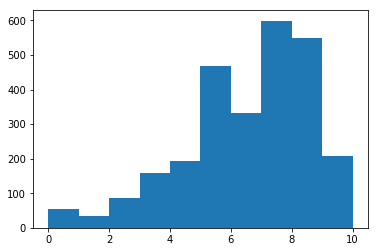

In [215]:
pft12 = y12[y12.partner == 0]['pplfair']
npft12 = y12[y12.partner == 1]['pplfair']
plt.hist(pft12)
plt.show()
plt.hist(npft12)
plt.show()

In [218]:
print(pft12.describe())
print(npft12.describe())

count    1616.000000
mean        5.857673
std         2.156890
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: pplfair, dtype: float64
count    2681.000000
mean        6.082432
std         2.111516
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: pplfair, dtype: float64


In [216]:
print(stats.ttest_ind(pft12,npft12))
#print(stats.wilcoxon(mtv12,ftv12))
print(stats.mannwhitneyu(pft12,npft12))
print("Median_test:{}".format(stats.median_test(pft12,npft12)))

Ttest_indResult(statistic=-3.3526650393131754, pvalue=0.0008073002028865902)
MannwhitneyuResult(statistic=2020679.0, pvalue=9.044005650613175e-05)
Median_test:(17.358626970933436, 3.0949020186893266e-05, 6.0, array([[ 710, 1355],
       [ 906, 1326]], dtype=int64))


It appears that those who live with a partner find people fairer than those who do not.

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [222]:
chscl = y14[y14.cntry == 'CH']['sclmeet']
descl = y14[y14.cntry == 'DE']['sclmeet']
esscl = y14[y14.cntry == 'ES']['sclmeet']
czscl = y14[y14.cntry == 'CZ']['sclmeet']

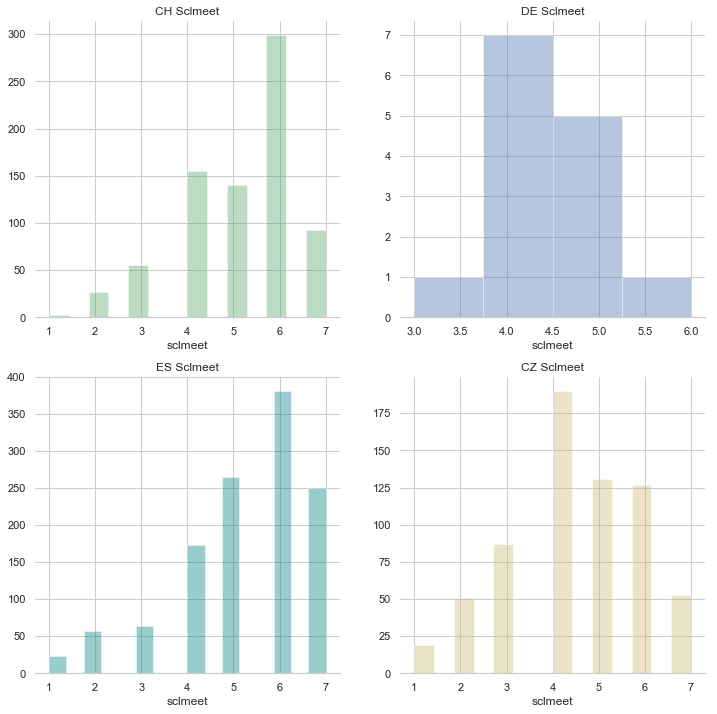

In [223]:
sns.set(style="whitegrid",color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)
sns.despine(left=True)
sns.distplot(chscl, color='g',kde=False, ax=axes[0, 0]).set_title('CH Sclmeet')
sns.distplot(descl, color='b',kde=False,ax=axes[0, 1]).set_title('DE Sclmeet')
sns.distplot(esscl,color='teal',kde=False, ax=axes[1, 0]).set_title('ES Sclmeet')
sns.distplot(czscl,color='y', kde=False, ax=axes[1, 1]).set_title('CZ Sclmeet')
plt.show()

In [232]:
meets=np.asarray(
    chscl.tolist() +
    descl.tolist() +
    esscl.tolist() +
    czscl.tolist()
)

countries = np.array(['CH']*len(chscl) + ['DE']*len(descl) + ['ES']*len(esscl) + ['CZ']*len(czscl))


tukey = pairwise_tukeyhsd(endog=meets,      # Data
                          groups=countries,   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.7088,-0.9029,-0.5147,True
CH,DE,-0.7331,-1.7201,0.2538,False
CH,ES,0.0996,-0.0688,0.2681,False
CZ,DE,-0.0243,-1.0128,0.9642,False
CZ,ES,0.8084,0.6313,0.9856,True
DE,ES,0.8328,-0.151,1.8165,False


In [236]:
stats.kruskal(chscl,descl,esscl,czscl)

KruskalResult(statistic=154.34188584548144, pvalue=3.0482759927520903e-33)

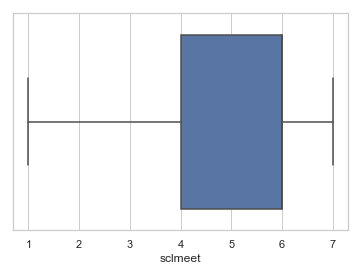

In [246]:
sns.boxplot(esscl)

In [264]:
F, p = stats.f_oneway(
    chscl,
    descl,
    esscl,
    czscl,
)

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

49.752082337377566
2.805511549308731e-31


looks like the group means are not all similar. 

C:\Users\willd\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


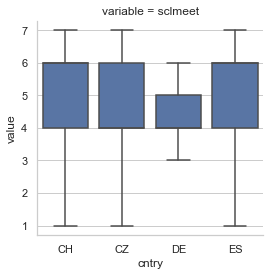

In [273]:
df_czch = df.loc[
    ((df['cntry'] == 'CH') | (df['cntry'] == 'DE') | (df.cntry == 'ES') | (df.cntry == 'CZ'))
    & (df['year'] == 7), ['cntry','sclmeet'] ]

df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col="variable", height=4, aspect=1)
g = g.map(sns.boxplot, "cntry", "value")
plt.show()

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [275]:
chslcact = y14[y14.cntry == 'CH'][['cntry','agea','sclact']]
seslcact = y14[y14.cntry == 'SE'][['cntry','agea','sclact']]
deslcact = y14[y14.cntry == 'DE'][['cntry','agea','sclact']]